 # Naive bayes algorithm from scratch 

Import the libraries have been needed 

In [55]:
import math 
import random 
import re
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

Start main function contains: 
    - [1]Load the data from CSV file by useing panda librarie.
    - [2]Shuffle and split the dataset into training and test datasets.
    - [3] Split your training data by class.
    - [4] Calculate the prior
    - [5] Make prediction on the testing set.
    - [6] Compute the accuracy, precision, and recall.
    - [7] Plot a scatter plot of the data, coloring each data point by its class.

In [56]:



def main():
    #[1] Load the data from CSV file by useing panda librarie.
    data=pd.read_csv("diabetes_csv.csv")
    print(" ")
    print(data.head())
    print(" ")
    #[2] Shuffle and split the dataset into training and test datasets
    train_size=int(0.75*data.shape[0])
    test_size=int(0.25*data.shape[0])
    print(" ")
    print("Training set size : "+ str(train_size))
    print("Testing set size : "+str(test_size))
    
    #[3] Split your training data by class
    train_set = data.iloc[:train_size]
    test_set = data.iloc[:test_size]
    
    classP = train_set.groupby('class')
    classP=classP.get_group('tested_positive')
    
    classN = train_set.groupby('class')
    classN=classN.get_group('tested_negative')
    
    #compute the mean vector and variance of the feature in each class.
    tclass=test_set.iloc[:,-1]
    print("--- The mean and variance for class tested_positive : ---")
    mean_var(classP)
        
    print(" ")
    print("--- The mean and variance for class tested_negative : ---")
    mean_var(classN)
   
    # [4] Calculate the prior.
    print(" ")    
    priorOfp = classP.shape[0]/train_size
    print("The prior of tested_positive is :"+str(priorOfp))
    priorOfn = classN.shape[0]/train_size
    print("The prior of tested_negative is :"+str(priorOfn))
    print(" ")
    # [4] Call conditional probabilities function.
    CPp = probaplity(classP,test_set)
    CPn=probaplity(classN,test_set) 
    
    # [5] Call prediction function.
    predicp=predect(CPp,priorOfp,priorOfn)
    predicn=predect(CPn,priorOfp,priorOfn)
    
   # [6] Compute the accuracy, precision, and recall.
    accp= accuracy_score(tclass, predicp)
    accn= accuracy_score(tclass, predicn)
    accurecy = ((accp+accn)/2)*100
    print('The accurecy is   {:6.3f} '.format(accurecy,' %' ))
    ppos=precision_score(tclass, predicp, average='weighted')
    pneg=precision_score(tclass, predicn, average='weighted')
    rep=recall_score(tclass, predicp,average='weighted')
    ren=recall_score(tclass, predicn,average='weighted')
    recall=((rep+ren)/2)
    precision=((ppos+pneg)/2)
    print("The precision  : {:6.3f} ".format(precision))
    print("The recall : {:6.3f}".format(recall))
    
    # [7] Plot a scatter plot of the data, coloring each data point by its class.
    colors = np.random.choice(range(2), 192)
    plt.scatter(test_set.iloc[:,-2], test_set.iloc[:,-3], c=colors)
    
   
    
   
        
        
        
    

- [5] Make prediction on the testing set.

In [57]:
def predect(array,priorOfp,priorOfn):
    predict=[]
    
    for i in range(len(array)):
        predict=[]
        p=priorOfp
        n=priorOfn
        for j in range(len(array[0])):
            p *= array[i][j]
            n *= array[i][j]
            if( j <= (len(array[0]))-1):
                m=max(p,n)
                if m==p:
                    predict.append("tested_positive")
                else:
                    predict.append("tested_negative")
    
    return predict

- [4] Calculate the conditional probabilities.

In [58]:
def probaplity(Class,test_set):
    
    CPp=[]
    labels = ['preg','plas','pres','skin','insu','mass','pedi','age']
    for i in range(len(labels)):
        m=np.mean(Class[labels[i]].values)
        v=np.var(Class[labels[i]].values)
        ts=test_set[labels[i]].values
        TM=(ts-m)**2
        e=np.exp(-(TM)/(2*v))
        CPp.append((1/math.sqrt(2*(math.pi)*v))*e)
    return CPp

- [3] Compute the mean vector and variance of the feature in each class

In [59]:
def mean_var(Class):
    
    labels = ['preg','plas','pres','skin','insu','mass','pedi','age']
    for i in range(len(labels)):
        m=np.mean(Class[labels[i]].values)
        v=np.var(Class[labels[i]].values)
        print(" ")
        print('The mean of feature '+labels[i]+'  is  {:6.3f} '.format(m) +' and the verince is {:6.3f}'.format(v))

 
   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive
 
 
Training set size : 576
Testing set size : 192
--- The mean and variance for class tested_positive : ---
 
The mean of feature preg  is   4.828  and the verince is 14.031
 
The mean of feature plas  is  139.732  and the verince is 1075.752
 
The mean of feature pres  is  69.924  and the verince is 486.323
 
The mean of feature skin  is  22.081  and the verince is 289.630
 
The mean of feature insu  is  103.197  and the verince is 18820.188
 
The mean of feature mass  is  35.321  and the verince is 52.635
 
The mean of feature pedi  is   0.565  and the verince is  0.148
 
The mean of fe

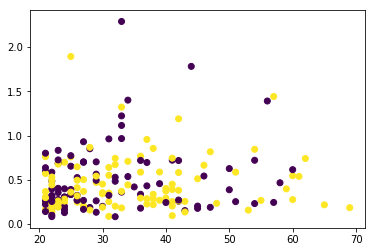

In [60]:
main()